In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter


In [24]:
df1 = pd.read_csv('C:/Users/User/Desktop/ratings_small.csv')
df2 = pd.read_csv('C:/Users/User/Desktop/movies_metadata.csv', low_memory=False)

In [25]:
df1 = df1.drop(['timestamp'], axis = 1)

In [26]:
df2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [27]:
df1

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [28]:
df2['id'] = pd.to_numeric(df2['id'], errors='coerce').fillna(0).astype(int)
df2 = df2.drop_duplicates('id')

In [29]:
df = df1.merge(df2, left_on='movieId', right_on='id')

In [30]:
df

,userId,movieId,rating,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,1371,2.5,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,tt0084602,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
1,1,1405,1.0,False,NaN,546883,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,1405,tt0015881,...,1924-12-04,0.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Greed,False,7.5,25.0
2,1,2105,4.0,False,"{'id': 2806, 'name': 'American Pie Collection'...",11000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,2105,tt0163651,...,1999-07-09,235483004.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's nothing like your first piece.,American Pie,False,6.4,2358.0
3,1,2193,2.0,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.crownintlpictures.com/lntitles.html,2193,tt0085980,...,1983-03-04,22587000.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,School's out...But Bobby's education has just ...,My Tutor,False,5.8,17.0
4,1,2294,2.0,False,NaN,22000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,2294,tt0261392,...,2001-08-22,33788161.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hollywood had it coming,Jay and Silent Bob Strike Back,False,6.4,491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44984,671,4995,4.0,False,NaN,15000000,"[{'id': 18, 'name': 'Drama'}]",NaN,4995,tt0118749,...,1997-09-11,43101594.0,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The life of a dreamer, the days of a business,...",Boogie Nights,False,7.5,812.0
44985,671,5816,4.0,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.granietfilm.nl/nl/ober.htm,5816,tt0476681,...,2006-09-28,0.0,95.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Waiter,False,6.3,8.0
44986,671,5902,3.5,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,5902,tt0075784,...,1977-06-15,50750000.0,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Out of the sky comes the screen's most incredi...,A Bridge Too Far,False,7.0,210.0
44987,671,5991,4.5,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,5991,tt0015064,...,1924-12-23,0.0,90.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,The Last Laugh,False,7.7,63.0


In [31]:
columns_to_drop = ['budget', 'id', 'imdb_id', 'original_title', 'overview', 'spoken_languages', 'tagline', 'title', 'belongs_to_collection', 'homepage', 'poster_path', 'production_companies', 'production_countries', 'movieId', 'status', 'release_date']

df = df.drop(columns = columns_to_drop, axis = 1)

In [32]:
print("Основная информация о данных:")
print(df.info())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44989 entries, 0 to 44988
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userId             44989 non-null  int64  
 1   rating             44989 non-null  float64
 2   adult              44989 non-null  object 
 3   genres             44989 non-null  object 
 4   original_language  44989 non-null  object 
 5   popularity         44989 non-null  object 
 6   revenue            44989 non-null  float64
 7   runtime            44985 non-null  float64
 8   video              44989 non-null  object 
 9   vote_average       44989 non-null  float64
 10  vote_count         44989 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.8+ MB
None


In [33]:
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isna().sum())


Количество пропущенных значений в каждом столбце:
userId               0
rating               0
adult                0
genres               0
original_language    0
popularity           0
revenue              0
runtime              4
video                0
vote_average         0
vote_count           0
dtype: int64


In [34]:
median_minpay = df['runtime'].median()
df['runtime'] = df['runtime'].fillna(median_minpay)

In [35]:
print("Уникальные значения adult:")
print(df['adult'].unique())
print("\nЧастотность значений adult:")
print(df['adult'].value_counts(dropna=False))

Уникальные значения adult:
['False' 'True']

Частотность значений adult:
adult
False    44988
True         1
Name: count, dtype: int64


In [38]:
df['adult'] = df['adult'].map({'False': 0, 'True': 1}).astype(int)

In [39]:

df['video'] = df['video'].astype(int)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

In [40]:
print(df['original_language'].unique())

['en' 'fr' 'de' 'pl' 'bs' 'it' 'hi' 'ru' 'es' 'zh' 'da' 'sv' 'he' 'fi'
 'mn' 'ja' 'nl' 'cs' 'pt' 'et' 'ko' 'cn' 'th' 'zu' 'fa' 'xx' 'ro' 'ta'
 'sr' 'bn' 'tr' 'hu' 'kk' 'ka' 'no' 'te' 'uk' 'tl']


In [41]:
df.head()

,userId,rating,adult,genres,original_language,popularity,revenue,runtime,video,vote_average,vote_count
0,1,2.5,0,"[{'id': 18, 'name': 'Drama'}]",en,11.673366,270000000.0,99.0,0,6.6,894.0
1,1,1.0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",en,6.925081,0.0,140.0,0,7.5,25.0
2,1,4.0,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,18.344227,235483004.0,95.0,0,6.4,2358.0
3,1,2.0,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,4.675460,22587000.0,97.0,0,5.8,17.0
4,1,2.0,0,"[{'id': 35, 'name': 'Comedy'}]",en,11.619446,33788161.0,104.0,0,6.4,491.0


In [42]:
from sklearn.preprocessing import LabelEncoder

langs = np.array(['en', 'fr', 'de', 'pl', 'bs', 'it', 'hi', 'ru', 'es', 'zh', 'da', 'sv', 'he', 'fi',
 'mn', 'ja', 'nl', 'cs', 'pt', 'et', 'ko', 'cn', 'th', 'zu', 'fa', 'xx', 'ro', 'ta',
 'sr', 'bn', 'tr', 'hu', 'kk', 'ka', 'no', 'te', 'uk', 'tl'])

le = LabelEncoder()
le.fit_transform(langs)

df['original_language_encoded'] = le.transform(df['original_language'])
df = df.drop(columns=['original_language'])

In [43]:
import ast
all_genres_set = set() #все жанры

for item in df['genres']:
    if item != '[]':
        try: #строка -> список словарей
            genres = ast.literal_eval(item)
            for g in genres:
                all_genres_set.add(g['name'])
        except:
            continue

for genre in all_genres_set:
    df[genre] = 0  

for idx, item in enumerate(df['genres']):
    if item != '[]':
        try:
            genres = ast.literal_eval(item)
            for g in genres:
                df.at[idx, g['name']] = 1 #1 где есть жанр
        except:
            continue

df = df.drop('genres', axis=1)
df_filled = df.fillna(0)


In [44]:
print(df.columns.tolist())

['userId', 'rating', 'adult', 'popularity', 'revenue', 'runtime', 'video', 'vote_average', 'vote_count', 'original_language_encoded', 'Horror', 'Music', 'Romance', 'Family', 'Adventure', 'Mystery', 'Fantasy', 'History', 'War', 'Comedy', 'Western', 'Documentary', 'Crime', 'Foreign', 'Drama', 'Thriller', 'Animation', 'Science Fiction', 'Action', 'TV Movie']


In [48]:
from sklearn.preprocessing import StandardScaler
features = ['popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

X = df[features].fillna(0)  

scaler = StandardScaler()  
X_scal = scaler.fit_transform(X) 

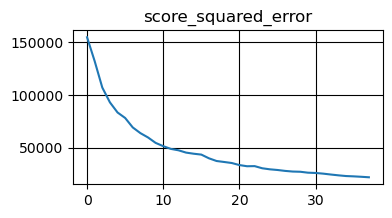

In [49]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category = UserWarning, message = "KMeans is known to have a memory leak on Windows with MKL")
arr_score = []

for i in range(2, 40):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)
    score = kmeans.inertia_
    arr_score.append(score)

plt.figure(figsize = (4, 2))
plt.title('score_squared_error')
plt.plot(arr_score, '-')
plt.grid(True, color = 'k')

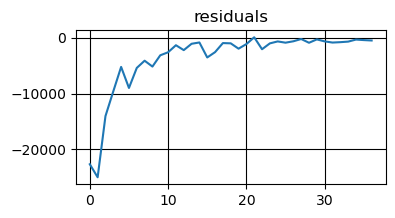

In [50]:
residual_arr = []

for i in range(len(arr_score) - 1):
    res = arr_score[i + 1] - arr_score[i]
    residual_arr.append(res)

plt.figure(figsize = (4, 2))
plt.title('residuals')
plt.plot(residual_arr, '-')
plt.grid(True, color = 'k')

In [51]:
# количество кластеров = 5

In [54]:
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

user_movie_matrix = df1.pivot_table(index = 'userId', columns = 'movieId', values = 'rating',  fill_value=0)

#нормализация
user_mean = user_movie_matrix.mean(axis=1) #средняя оценка по пользователям((4+4)/2)
user_movie_normalized = user_movie_matrix.sub(user_mean, axis=0) #средняя - каждая(4-3, 4-4 и тд)

pca = PCA(n_components = 200) 
user_features = pca.fit_transform(user_movie_normalized)

print(f"Пользователи: {user_movie_matrix.shape[0]}")
print(f"Фильмы: {user_movie_matrix.shape[1]}")
print(f"Дисперсия: {pca.explained_variance_ratio_.sum():.2%}")

Пользователи: 671
Фильмы: 9066
Дисперсия: 81.21%


Text(608.3692810457518, 0.5, 'Пользователи')

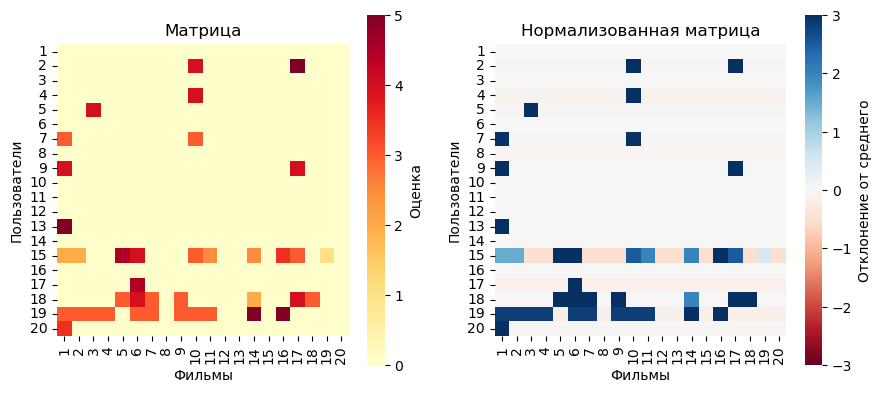

In [78]:
plt.figure(figsize=(16, 10))
users = movies = 20

sample_matrix = user_movie_matrix.iloc[:users, :movies]
matrix_normalized = user_movie_normalized.iloc[:users, :movies]

plt.subplot(2, 3, 1)
sns.heatmap(sample_matrix, cmap='YlOrRd', cbar_kws={'label': 'Оценка'}, square=True, annot=False, fmt='.0f')
plt.title('Матрица')
plt.xlabel('Фильмы')
plt.ylabel('Пользователи')

plt.subplot(2, 3, 2)
sns.heatmap(matrix_normalized, cmap='RdBu', center=0, cbar_kws={'label': 'Отклонение от среднего'}, square=True, annot=False, fmt='.1f', vmin=-3, vmax=3)
plt.title('Нормализованная матрица')
plt.xlabel('Фильмы')
plt.ylabel('Пользователи')




In [56]:
from sklearn.metrics.pairwise import cosine_similarity

matrix = csr_matrix(user_movie_matrix.values) #сжимаем матрицу
user_similarity = cosine_similarity(matrix)

user_sim_df = pd.DataFrame(user_similarity, index = user_movie_matrix.index, columns = user_movie_matrix.index)

print(f"\nМатрица схожести пользователей: {user_sim_df.shape}")
print(f"\nПример схожести пользователя 444 с другими:")
print(user_sim_df.loc[444].sort_values(ascending=False)[1:6]) #сортировка по убыванию схожести


Матрица схожести пользователей: (671, 671)

Пример схожести пользователя 444 с другими:
userId
351    0.194182
322    0.157408
231    0.126476
229    0.113413
214    0.108469
Name: 444, dtype: float64


In [65]:
def recommendation_system(user_id, n=10):
    nearest = user_sim_df.loc[user_id].sort_values(ascending=False)[1:n+1]
    
    recommendations = {}
    for neighbor, similarity in nearest.items():#фильмы соседа с высоким рейтингом
        neighbor_movies = user_movie_matrix.loc[neighbor]
        high_rated = neighbor_movies[neighbor_movies > 3].index
        
        for movie in high_rated:#скип если уже видели фильм
            if user_movie_matrix.loc[user_id, movie] == 0:
                if movie not in recommendations:
                    recommendations[movie] = 0
                recommendations[movie] += similarity
    
    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return sorted_recs[:n]

user_id = 444
print(f"Рекомендации для пользователя {user_id}:")
for movie, score in collaborative_recommendation_system(user_id, 5):
    print(f"Фильм {movie} (сила: {score:.3f})")

Рекомендации для пользователя 444:
Фильм 858 (сила: 0.416)
Фильм 912 (сила: 0.352)
Фильм 1221 (сила: 0.348)
Фильм 908 (сила: 0.321)
Фильм 1035 (сила: 0.308)
